## Style Transfer Using GAN

### Variables, Hyperparamaters and libraries import

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
#Import all the required libraries
# %pip install pandas numpy tensorflow matplotlib imageio scikit-image
# %pip install git+https://github.com/tensorflow/docs
import os
from os import listdir
import time
import glob
import imageio
import numpy as np
import tensorflow as tf
from numpy import asarray
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from skimage.io import imread
import matplotlib.pyplot as plt
from skimage.transform import resize
from tensorflow.keras.utils import plot_model
#import tensorflow_docs.vis.embed as embed

2025-05-08 14:01:55.812587: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746712916.011086      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746712916.068829      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
OUTPUT_FOLDER = './Output/'
TIMESTAMP = str(time.strftime('%Y%m%d%H%M%S'))
TEMP_FOLDER = OUTPUT_FOLDER + TIMESTAMP + '/'

if os.path.exists(OUTPUT_FOLDER):
    os.mkdir(TEMP_FOLDER)
else:
    os.mkdir(OUTPUT_FOLDER)
    os.mkdir(TEMP_FOLDER)

BUFFER_SIZE = 35
BATCH_SIZE = 5

IMG_HEIGHT = 256
IMG_WIDTH = 256

### Data Initialization and Loading

In [5]:
# load and resize images
def load_images(path, size=(IMG_HEIGHT,IMG_WIDTH)):
    data_list = list()

    for filename in listdir(path):
        pixels = load_img(path + filename, target_size=size)
        # convert to numpy array
        pixels = img_to_array(pixels)
        # store the data
        data_list.append(pixels)
    return asarray(data_list)

In [6]:
# tr1_data = load_images('/kaggle/input/d/ganeshb24/brain-mri-scans/Brain_MRI_Scans/Augmented+Real_T1/')
# tr2_data = load_images('/kaggle/input/d/ganeshb24/brain-mri-scans/Brain_MRI_Scans/Augmented+Real_T2/')

# tr1_data

# #convert to grayscale
# tr1_data = tf.image.rgb_to_grayscale(tr1_data)
# tr2_data = tf.image.rgb_to_grayscale(tr2_data)

In [6]:
np.min(tr1_data[0]), np.max(tr1_data[0])

NameError: name 'tr1_data' is not defined

##Data Augmentation

In [7]:

# #Simulates thermal/electronic noise in scanners
# def add_gaussian_noise(image, mean=0.0, stddev=15.0):
#     noise = tf.random.normal(shape=tf.shape(image), mean=mean, stddev=stddev, dtype=tf.float32)
#     noisy_image = tf.clip_by_value(image + noise, 0.0, 255.0)
#     return noisy_image

# # Mimics scanner calibration issues
# def intensity_shift(image, shift_range=30):
#     shift = tf.random.uniform([], -shift_range, shift_range, dtype=tf.float32)
#     shifted_image = image + shift
#     return tf.clip_by_value(shifted_image, 0.0, 255.0)


# #Simulates non-uniform magnetic field causing smooth illumination bias
# def intensity_gradient(image):
#     height, width, _ = image.shape
#     gradient = tf.linspace(0.8, 1.2, width)
#     gradient = tf.reshape(gradient, (1, width, 1))
#     biased_image = image * gradient
#     return tf.clip_by_value(biased_image, 0.0, 255.0)

# #MRI scans from different scanners may have varying contrast levels
# def random_contrast(image, lower=0.7, upper=1.3):
#     # Contrast variation in the range [0, 255]
#     contrast_factor = tf.random.uniform([], lower, upper)
#     contrast_image = image * contrast_factor
#     return tf.clip_by_value(contrast_image, 0.0, 255.0)


In [8]:
# # Visualize all
# fig, axs = plt.subplots(1, 5, figsize=(20, 5))

# axs[0].imshow(tr1_data[0], cmap="grey")  # Original
# axs[0].set_title('Original')
# axs[1].imshow(add_gaussian_noise(tr1_data[0]), cmap="grey")
# axs[1].set_title('Gaussian Noise')
# axs[2].imshow(intensity_gradient(tr1_data[0]), cmap="grey")
# axs[2].set_title('Biased Magnetic Field')
# axs[3].imshow(random_contrast(tr1_data[0]), cmap="grey")
# axs[3].set_title('Randomized Contrast')
# axs[4].imshow(intensity_shift(tr1_data[0]), cmap="grey")
# axs[4].set_title('Intensity Shift')

# for ax in axs:
#     ax.axis('off')

# plt.show()

In [9]:
# # Visualize all
# fig, axs = plt.subplots(1, 5, figsize=(20, 5))

# axs[0].imshow(tr2_data[0], cmap="grey")  # Original
# axs[0].set_title('Original')
# axs[1].imshow(add_gaussian_noise(tr2_data[0]), cmap="grey")
# axs[1].set_title('Gaussian Noise')
# axs[2].imshow(intensity_gradient(tr2_data[0]), cmap="grey")
# axs[2].set_title('Biased Magnetic Field')
# axs[3].imshow(random_contrast(tr2_data[0]), cmap="grey")
# axs[3].set_title('Randomized Contrast')
# axs[4].imshow(intensity_shift(tr2_data[0]), cmap="grey")
# axs[4].set_title('Intensity Shift')

# for ax in axs:
#     ax.axis('off')

# plt.show()

In [10]:
# import random
# from tensorflow.keras.utils import save_img

In [11]:
# # === Apply a random combination of 1 to 3 augmentations ===

# AUGMENTATIONS = [add_gaussian_noise, intensity_gradient, random_contrast, intensity_shift]

# def apply_random_augmentations(image):
#     num_augments = random.randint(1, 3)
#     aug_funcs = random.sample(AUGMENTATIONS, num_augments)
#     aug_image = tf.identity(image)
#     for func in aug_funcs:
#         aug_image = func(aug_image)
#     return aug_image

# # === Main Processing Function ===

# def process_and_save_augmented_images(input_folder, output_folder, target_size=(128, 128)):
#     os.makedirs(output_folder, exist_ok=True)
#     filenames = [f for f in os.listdir(input_folder) if f.lower().endswith(('.png'))]

#     for filename in filenames:
#         image_path = os.path.join(input_folder, filename)
#         image = load_img(image_path, target_size=target_size)
#         image = img_to_array(image)  # This will be float32 in 0–255 range

#         for i in range(2):  # Generate 2 augmented versions
#             aug_image = apply_random_augmentations(image)
#             aug_filename = f"{os.path.splitext(filename)[0]}_aug{i+1}.png"
#             save_img(os.path.join(output_folder, aug_filename), aug_image)

#     print("All augmentations saved!")


In [12]:
# # For T1 style images
# input_dir = r"G:\My Drive\Brain_MRI_Scans\Tr1\TrainT1"
# output_dir = r"G:\My Drive\Brain_MRI_Scans\Augmented+Real_T1"

# process_and_save_augmented_images(input_dir, output_dir)

In [13]:
# #For T2 style images
# input_dir = r"G:\My Drive\Brain_MRI_Scans\Tr2\TrainT2"
# output_dir = r"G:\My Drive\Brain_MRI_Scans\Augmented+Real_T2"

# process_and_save_augmented_images(input_dir, output_dir)

In [14]:
tr1_data = load_images('/kaggle/input/d/ganeshb24/brain-mri-scans/Brain_MRI_Scans/Augmented+Real_T1/')
tr2_data = load_images('/kaggle/input/d/ganeshb24/brain-mri-scans/Brain_MRI_Scans/Augmented+Real_T2/')

#convert to grayscale
tr1_data = tf.image.rgb_to_grayscale(tr1_data)
tr2_data = tf.image.rgb_to_grayscale(tr2_data)

print(tr1_data.shape)
print(tr2_data.shape)
tr1= tf.data.Dataset.from_tensor_slices(tf.convert_to_tensor(tr1_data))
tr2= tf.data.Dataset.from_tensor_slices(tf.convert_to_tensor(tr2_data))

tr1

I0000 00:00:1746712953.434640      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


(70, 256, 256, 1)
(74, 256, 256, 1)


<_TensorSliceDataset element_spec=TensorSpec(shape=(256, 256, 1), dtype=tf.float32, name=None)>

In [15]:
tr2

<_TensorSliceDataset element_spec=TensorSpec(shape=(256, 256, 1), dtype=tf.float32, name=None)>

### Image Preprocessing

#### Image to Pixel conversion

 for cmap; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

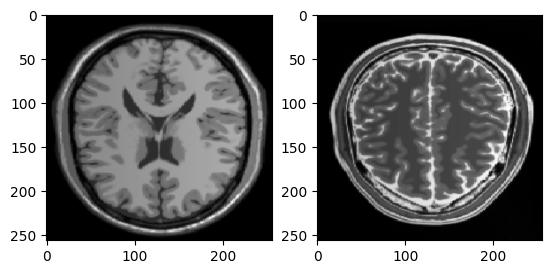

In [16]:
# Convert images to pixels and append it to a dataframe
fig, axs = plt.subplots(1,2)
axs[0].imshow(tr1_data[0], cmap='gray')
axs[1].imshow(tr2_data[0], cmap='gray')
plt.show();

#### Image Resizing & pixel Normalization

In [17]:
def normalize(image):
    image =  tf.cast(image, tf.float32)
    image= (image / 127.5) - 1
    return image

# def preprocess_image_train(image):
#     image = tf.image.random_flip_left_right(image)
#     image = normalize(image)
#     return image

AUTOTUNE = tf.data.experimental.AUTOTUNE
tr1 = tr1.map(normalize, num_parallel_calls=AUTOTUNE).cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
tr2 = tr2.map(normalize, num_parallel_calls=AUTOTUNE).cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE)


#### Image Reshaping, Shuffling and Batch Processing

In [18]:
sample_tr1 = next(iter(tr1))
sample_tr2 = next(iter(tr2))

### Loss Functions & Optimizer

In [47]:
loss_obj = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real, generated):
    real_loss = loss_obj(tf.ones_like(real), real)
    generated_loss = loss_obj(tf.zeros_like(generated), generated)
    total_disc_loss = real_loss + generated_loss
    return total_disc_loss * 0.5

def generator_loss(generated):
    return loss_obj(tf.ones_like(generated), generated)

def cycle_loss(real_image, cycled_image):
    loss = tf.reduce_mean(tf.abs(real_image - cycled_image))
    return 10.0 * loss

def identity_loss(real_image, same_image):
    loss = tf.reduce_mean(tf.abs(real_image - same_image))
    return 0.5 * loss

generator_g_optimizer = tf.keras.optimizers.Adam(1e-4, beta_1=0.5)
generator_f_optimizer = tf.keras.optimizers.Adam(1e-4, beta_1=0.5)

discriminator_x_optimizer = tf.keras.optimizers.Adam(1e-4, beta_1=0.5)
discriminator_y_optimizer = tf.keras.optimizers.Adam(1e-4, beta_1=0.5)

### Model Building

#### Instance Normalization

In [20]:
class InstanceNormalization(tf.keras.layers.Layer):
    # Initialization of Objects
    def __init__(self, epsilon=1e-5):
        # calling parent's init
        super(InstanceNormalization, self).__init__()
        self.epsilon = epsilon

    def build(self, input_shape):
        self.scale = self.add_weight(
            name='scale',
            shape=input_shape[-1:],
            initializer=tf.random_normal_initializer(1., 0.02),
            trainable=True)
        self.offset = self.add_weight(
            name='offset',
            shape=input_shape[-1:],
            initializer='zeros',
            trainable=True)

    def call(self, x):
        # Compute Mean and Variance, Axes=[1,2] ensures Instance Normalization
        mean, variance = tf.nn.moments(x, axes=[1, 2], keepdims=True)
        inv = tf.math.rsqrt(variance + self.epsilon)
        normalized = (x - mean) * inv
        return self.scale * normalized + self.offset

#### Downsampling and Upsampling

In [21]:
def downsample(filters, size, apply_norm=True):
    initializer = tf.random_normal_initializer(0., 0.02)
    result = tf.keras.Sequential()
    # Add Conv2d layer
    result.add(tf.keras.layers.Conv2D(filters, size, strides=2, padding='same',
                                      kernel_initializer=initializer, use_bias=False))
    # Add Normalization layer
    if apply_norm:
        result.add(InstanceNormalization())
    # Add Leaky Relu Activation
    result.add(tf.keras.layers.LeakyReLU(alpha = 0.2))
    return result

def upsample(filters, size, apply_dropout=False):
    initializer = tf.random_normal_initializer(0., 0.02)
    result = tf.keras.Sequential()
    # Add Transposed Conv2d layer
    result.add(tf.keras.layers.Conv2DTranspose(filters, size, strides=2, padding='same',
                                               kernel_initializer=initializer, use_bias=False))
    # Add Normalization Layer
    result.add(InstanceNormalization())
    # Conditionally add Dropout layer
    if apply_dropout:
        result.add(tf.keras.layers.Dropout(0.4))
    # Add Relu Activation Layer
    result.add(tf.keras.layers.ReLU())
    return result

#### Generator

In [22]:
# Unet Generator is a combination of Convolution + Transposed Convolution Layers
def unet_generator():
    down_stack = [
        downsample(64, 4, False),
        downsample(128, 4),
        downsample(256, 4),
        downsample(512, 4),
        downsample(512, 4),
        downsample(512, 4),
        downsample(512, 4),
        downsample(512, 4)

    ]
    up_stack = [
        upsample(512, 4, True),
        upsample(512, 4, True),
        upsample(512, 4, True),
        upsample(512, 4),
        upsample(256, 4),
        upsample(128, 4),
        upsample(64, 4)
    ]
    initializer = tf.random_normal_initializer(0., 0.02)
    last = tf.keras.layers.Conv2DTranspose(1, 4, strides=2, padding='same', kernel_initializer=initializer,
                                           activation='tanh') # (bs, 32, 32, 1)
    concat = tf.keras.layers.Concatenate()
    inputs = tf.keras.layers.Input(shape=[IMG_HEIGHT, IMG_WIDTH, 1])
    x = inputs
    # Downsampling through the model
    skips = []
    for down in down_stack:
        x = down(x)
        skips.append(x)

    skips = reversed(skips[:-1])
    # Upsampling and establishing the skip connections
    for up, skip in zip(up_stack, skips):
        x = up(x)
        x = concat([x, skip])
    x = last(x)
    return tf.keras.Model(inputs=inputs, outputs=x)

In [23]:
generator_g = unet_generator()
generator_f = unet_generator()

generator_g.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 1)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential (Sequential)   │ (None, 128, 128, 64)   │          1,024 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_1 (Sequential) │ (None, 64, 64, 128)    │        131,328 │ sequential[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_2 (Sequential) │ (None, 32, 32, 256)    │        524,800 │ sequential_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_3 (Sequential) │ (None, 16, 16, 512)    │      2,098,176 │ sequential_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_4 (Sequential) │ (None, 8, 8, 512)      │      4,195,328 │ sequential_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_5 (Sequential) │ (None, 4, 4, 512)      │      4,195,328 │ sequential_4[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_6 (Sequential) │ (None, 2, 2, 512)      │      4,195,328 │ sequential_5[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_7 (Sequential) │ (None, 1, 1, 512)      │      4,195,328 │ sequential_6[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_8 (Sequential) │ (None, 2, 2, 512)      │      4,195,328 │ sequential_7[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 128, 128, 128)  │              0 │ sequential_8[0][0],    │
│                           │                        │                │ sequential_6[0][0],    │
│                           │                        │                │ sequential_9[0][0],    │
│                           │                        │                │ sequential_5[0][0],    │
│                           │                        │                │ sequential_10[0][0],   │
│                           │                        │                │ sequential_4[0][0],    │
│                           │                        │                │ sequential_11[0][0],   │
│                           │                        │                │ sequential_3[0][0],    │
│                           │                        │                │ sequential_12[0][0],   │
│                           │                        │                │ sequential_2[0][0],    │
│                           │                        │                │ sequential_13[0][0],   │
│                           │                        │                │ sequential_1[0][0],    │
│                           │                        │                │ sequential_14[0][0],   │
│                           │                        │                │ sequential[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_9 (Sequential) │ (None, 4, 4, 512)      │      8,389,632 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_10             │ (None, 8, 8, 512)      │      8,389,632 │ concatenate[1][0]      │
│ (Sequential)         

 Total params: 54,408,833 (207.55 MB)

 Trainable params: 54,408,833 (207.55 MB)

 Non-trainable params: 0 (0.00 B)

#### Discriminator

In [24]:
# Discriminators only contain Convolutional Layers and no Transposed Convolution is not used
def discriminator():
    initializer = tf.random_normal_initializer(0., 0.02)
    # add input layer of size (32, 32, 1)
    inp = tf.keras.layers.Input(shape=[IMG_HEIGHT, IMG_WIDTH, 1], name='input_image')
    x = inp

    # add downsampling step here
    down1 = downsample(64, 4, False)(x) # (bs, 16, 16, 64)
    down2 = downsample(128, 4)(down1) # (bs, 8, 8, 128)
    down3 = downsample(256, 4)(down2) # (bs, 8, 8, 128)
    # add a padding layer here
    zero_pad1 = tf.keras.layers.ZeroPadding2D()(down3) # (bs, 10, 10, 128)

    # implement a concrete downsampling layer here
    conv = tf.keras.layers.Conv2D(512, 4, strides=1, kernel_initializer=initializer,
                                  use_bias=False)(zero_pad1) # (bs, 7, 7, 256)
    norm1 = InstanceNormalization()(conv)
    leaky_relu = tf.keras.layers.LeakyReLU()(norm1)

    # apply zero padding layer
    zero_pad2 = tf.keras.layers.ZeroPadding2D()(leaky_relu) # (bs, 9, 9, 256)

    # add a last pure 2D Convolution layer
    last = tf.keras.layers.Conv2D(1, 4, strides=1, kernel_initializer=initializer)(zero_pad2) # (bs, 6, 6, 1)
    return tf.keras.Model(inputs=inp, outputs=last)

In [40]:
# # Trying PatchGAN Discriminator
# def discriminator():
#     initializer = tf.random_normal_initializer(0., 0.02)
#     inp = tf.keras.layers.Input(shape=[256, 256, 1])
#     x = downsample(64, 4, False)(inp)
#     x = downsample(128, 4)(x)
#     x = downsample(256, 4)(x)
#     x = downsample(512, 4)(x)
#     x = tf.keras.layers.Conv2D(1, 4, strides=1, padding='same')(x)
#     return tf.keras.Model(inputs=inp, outputs=x)


In [41]:
discriminator_x = discriminator()
discriminator_y = discriminator()

discriminator_x.summary()

Model: "functional_52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_44 (InputLayer)          │ (None, 256, 256, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_42 (Sequential)           │ (None, 128, 128, 64)        │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_43 (Sequential)           │ (None, 64, 64, 128)         │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_44 (Sequential)           │ (None, 32, 32, 256)         │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_45 (Sequential)           │ (None, 16, 16, 512)         │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_40 (Conv2D)                   │ (None, 16, 16, 1)           │           8,193 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,763,521 (10.54 MB)

 Trainable params: 2,763,521 (10.54 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# to_t2_img_data = generator_g(sample_tr1)
# to_t1_img_data = generator_f(sample_tr2)
# plt.figure(figsize=(4, 4))

# imgs = [sample_tr1, to_t2_img_data, sample_tr2, to_t1_img_data]
# title = ['T1_Img_data', 'To T2_Img_data', 'T2_Img_data', 'To T1_Img_data']

# for i in range(len(imgs)):
#     plt.subplot(2, 2, i+1)
#     plt.title(title[i])
#     plt.imshow(imgs[i][0], cmap='gray')
#     plt.axis('off')
# plt.show()

### Model Training

#### Checkpoint Initialization

In [27]:
checkpoint_path = "/content/Output/20250504151440/" +"Trained_Model"

ckpt = tf.train.Checkpoint(generator_g=generator_g,
                           generator_f=generator_f,
                           discriminator_x=discriminator_x,
                           discriminator_y=discriminator_y,
                           generator_g_optimizer=generator_g_optimizer,
                           generator_f_optimizer=generator_f_optimizer,
                           discriminator_x_optimizer=discriminator_x_optimizer,
                           discriminator_y_optimizer=discriminator_y_optimizer)

ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=3)

# if a checkpoint exists, restore the latest checkpoint.
if ckpt_manager.latest_checkpoint:
    ckpt.restore(ckpt_manager.latest_checkpoint)
    print ('Latest checkpoint restored!!')

In [42]:

def generate_images(model1, test_input1, model2, test_input2, epoch):
    prediction1 = model1(test_input1)
    prediction2 = model2(test_input2)
    plt.figure(figsize=(8, 4))
    display_list = [test_input1[0], prediction1[0], test_input2[0], prediction2[0]]
    title = ['Input Image', 'Predicted Image', 'Input Image', 'Predicted Image']
    for i in range(4):
        plt.subplot(1, 4, i+1)
        plt.title(title[i])
        plt.imshow(display_list[i].numpy()[:, :, 0], cmap='gray')
        plt.axis('off')

    plt.savefig(TEMP_FOLDER +'image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()

In [29]:
# @tf.function
# def train_step(real_x, real_y):
#     # persistent is set to True because the tape is used more than
#     # once to calculate the gradients.
#     with tf.GradientTape(persistent=True) as tape:
#         # Generator G translates X -> Y
#         # Generator F translates Y -> X
#         fake_y = generator_g(real_x, training=True)
#         cycled_x = generator_f(fake_y, training=True)

#         fake_x = generator_f(real_y, training=True)
#         cycled_y = generator_g(fake_x, training=True)

#         # same_x and same_y are used for identity loss.
#         same_x = generator_f(real_x, training=True)
#         same_y = generator_g(real_y, training=True)

#         disc_real_x = discriminator_x(real_x, training=True)
#         disc_real_y = discriminator_y(real_y, training=True)

#         disc_fake_x = discriminator_x(fake_x, training=True)
#         disc_fake_y = discriminator_y(fake_y, training=True)

#         # calculate the loss
#         gen_g_loss = generator_loss(disc_fake_y)
#         gen_f_loss = generator_loss(disc_fake_x)

#         total_cycle_loss = cycle_loss(real_x, cycled_x) + cycle_loss(real_y, cycled_y)

#         # Total generator loss = BCE loss + cycle loss + identity loss
#         total_gen_g_loss = gen_g_loss + total_cycle_loss + identity_loss(real_y, same_y)
#         total_gen_f_loss = gen_f_loss + total_cycle_loss + identity_loss(real_x, same_x)

#         # Discriminator's loss
#         disc_x_loss = discriminator_loss(disc_real_x, disc_fake_x)
#         disc_y_loss = discriminator_loss(disc_real_y, disc_fake_y)

#     # Calculate the gradients for generator and discriminator
#     generator_g_gradients = tape.gradient(total_gen_g_loss, generator_g.trainable_variables)
#     generator_f_gradients = tape.gradient(total_gen_f_loss, generator_f.trainable_variables)

#     discriminator_x_gradients = tape.gradient(disc_x_loss, discriminator_x.trainable_variables)
#     discriminator_y_gradients = tape.gradient(disc_y_loss, discriminator_y.trainable_variables)

#     # Apply the gradients to the optimizer
#     generator_g_optimizer.apply_gradients(zip(generator_g_gradients, generator_g.trainable_variables))
#     generator_f_optimizer.apply_gradients(zip(generator_f_gradients, generator_f.trainable_variables))

#     discriminator_x_optimizer.apply_gradients(zip(discriminator_x_gradients, discriminator_x.trainable_variables))
#     discriminator_y_optimizer.apply_gradients(zip(discriminator_y_gradients, discriminator_y.trainable_variables))

In [43]:
@tf.function
def train_step(real_x, real_y):
    with tf.GradientTape(persistent=True) as tape:
        fake_y = generator_g(real_x, training=True)
        cycled_x = generator_f(fake_y, training=True)

        fake_x = generator_f(real_y, training=True)
        cycled_y = generator_g(fake_x, training=True)

        same_x = generator_f(real_x, training=True)
        same_y = generator_g(real_y, training=True)

        disc_real_x = discriminator_x(real_x, training=True)
        disc_real_y = discriminator_y(real_y, training=True)
        disc_fake_x = discriminator_x(fake_x, training=True)
        disc_fake_y = discriminator_y(fake_y, training=True)

        # Losses
        gen_g_loss = generator_loss(disc_fake_y)
        gen_f_loss = generator_loss(disc_fake_x)
        cyc_loss = cycle_loss(real_x, cycled_x) + cycle_loss(real_y, cycled_y)
        id_loss = identity_loss(real_y, same_y) + identity_loss(real_x, same_x)

        total_gen_g_loss = gen_g_loss + cyc_loss + identity_loss(real_y, same_y)
        total_gen_f_loss = gen_f_loss + cyc_loss + identity_loss(real_x, same_x)

        disc_x_loss = discriminator_loss(disc_real_x, disc_fake_x)
        disc_y_loss = discriminator_loss(disc_real_y, disc_fake_y)

    # Apply Gradients
    generator_g_optimizer.apply_gradients(zip(tape.gradient(total_gen_g_loss, generator_g.trainable_variables), generator_g.trainable_variables))
    generator_f_optimizer.apply_gradients(zip(tape.gradient(total_gen_f_loss, generator_f.trainable_variables), generator_f.trainable_variables))
    discriminator_x_optimizer.apply_gradients(zip(tape.gradient(disc_x_loss, discriminator_x.trainable_variables), discriminator_x.trainable_variables))
    discriminator_y_optimizer.apply_gradients(zip(tape.gradient(disc_y_loss, discriminator_y.trainable_variables), discriminator_y.trainable_variables))

    return {
        'gen_g_loss': gen_g_loss,
        'gen_f_loss': gen_f_loss,
        'cycle_loss': cyc_loss,
        'identity_loss': id_loss,
        'disc_x_loss': disc_x_loss,
        'disc_y_loss': disc_y_loss
    }


In [44]:
EPOCHS = 100

In [45]:
# for epoch in range(1, EPOCHS+1):
#     for image_x, image_y in tf.data.Dataset.zip((tr1, tr2)):
#         train_step(image_x, image_y)
#     generate_images(generator_g, sample_tr1, generator_f, sample_tr2, epoch)
#     ckpt_save_path = ckpt_manager.save()
#     print('Saving checkpoint for epoch', epoch, 'at', ckpt_save_path)

In [46]:
for epoch in range(1, EPOCHS + 1):
    print(f"\nEpoch {epoch}/{EPOCHS}")
    
    total_losses = {
        'gen_g_loss': 0,
        'gen_f_loss': 0,
        'cycle_loss': 0,
        'identity_loss': 0,
        'disc_x_loss': 0,
        'disc_y_loss': 0
    }

    steps = 0
    for image_x, image_y in tf.data.Dataset.zip((tr1, tr2)):
        losses = train_step(image_x, image_y)
        for key in total_losses:
            total_losses[key] += losses[key]
        steps += 1

    avg_losses = {k: v / steps for k, v in total_losses.items()}
    print(f"Avg Losses -> GenG: {avg_losses['gen_g_loss']:.4f}, GenF: {avg_losses['gen_f_loss']:.4f}, "
          f"Cycle: {avg_losses['cycle_loss']:.4f}, Identity: {avg_losses['identity_loss']:.4f}, "
          f"DiscX: {avg_losses['disc_x_loss']:.4f}, DiscY: {avg_losses['disc_y_loss']:.4f}")

    generate_images(generator_g, sample_tr1, generator_f, sample_tr2, epoch)
    ckpt_save_path = ckpt_manager.save()
    print('Checkpoint saved at', ckpt_save_path)



Epoch 1/100


ValueError: in user code:

    File "/tmp/ipykernel_31/1096042109.py", line 33, in train_step  *
        discriminator_x_optimizer.apply_gradients(zip(tape.gradient(disc_x_loss, discriminator_x.trainable_variables), discriminator_x.trainable_variables))
    File "/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py", line 291, in apply_gradients  **
        self.apply(grads, trainable_variables)
    File "/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py", line 332, in apply
        self._check_variables_are_known(trainable_variables)
    File "/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py", line 237, in _check_variables_are_known
        raise ValueError(

    ValueError: Unknown variable: <KerasVariable shape=(4, 4, 1, 64), dtype=float32, path=sequential_42/conv2d_36/kernel>. This optimizer can only be called for the variables it was originally built with. When working with a new set of variables, you should recreate a new optimizer instance.


In [ ]:
anim_file = TEMP_FOLDER + 'cyclegan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob( TEMP_FOLDER + 'image*.png')
  filenames = sorted(filenames)
  for filename in filenames:
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)

In [ ]:
embed.embed_file(anim_file)

In [34]:
def test_model(model, test_input):
    prediction = model(test_input)
    plt.figure(figsize=(5, 5))
    display_list = [test_input[0], prediction[0]]
    title = ['Input Image', 'Predicted Image', 'Expected Image']
    for i in range(2):
        plt.subplot(1, 2, i+1)
        plt.title(title[i])
        # getting the pixel values between [0, 1] to plot it.
        plt.imshow(display_list[i].numpy()[:, :, 0] * 0.5 + 0.5, cmap='gray')
        plt.axis('off')
    plt.show()

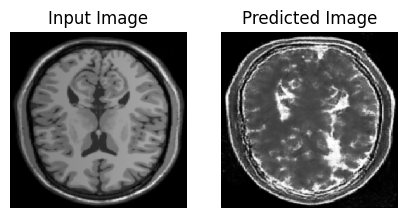

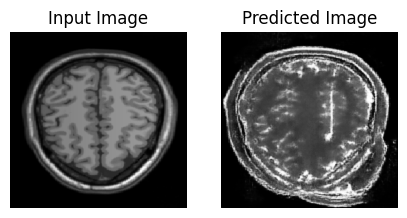

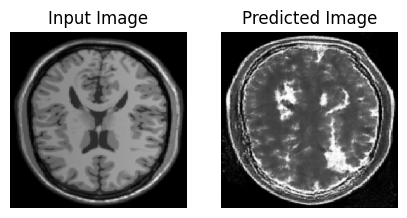

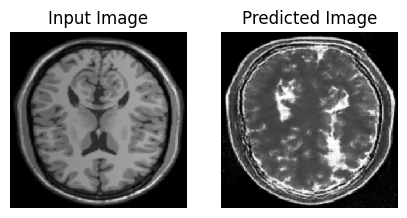

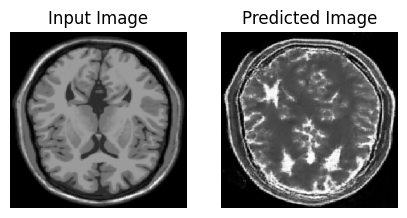

In [35]:
# Run the trained model on the test dataset
for inp in tr1.take(5):
    test_model(generator_g, inp)

In [36]:

test_image = load_img("/kaggle/input/d/ganeshb24/brain-mri-scans/Brain_MRI_Scans/Val1/Image19.png", target_size=(IMG_HEIGHT,IMG_WIDTH))
        # convert to numpy array
test_image = img_to_array(test_image)
        # store the data
print(test_image.shape)
test_image = asarray(test_image)
 #convert to grayscale
test_image = tf.image.rgb_to_grayscale(test_image)
test_image = tf.expand_dims(test_image, axis=0)
print(test_image.shape)

test= tf.data.Dataset.from_tensor_slices(tf.convert_to_tensor(test_image))

test

(256, 256, 3)
(1, 256, 256, 1)


<_TensorSliceDataset element_spec=TensorSpec(shape=(256, 256, 1), dtype=tf.float32, name=None)>

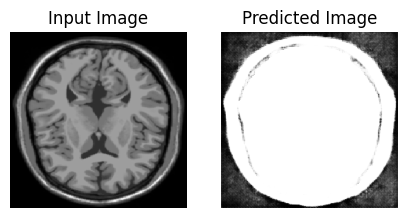

In [37]:
for p in test.take(1): # Takes 1 batch
    test_model(generator_g, test_image)         # Predict 1 batch


In [ ]:
!zip -r /content/output.zip /content/Output/20250504151440
